# Conic Sections

A conic section is the zero set of a quadratic function of two variables

\begin{equation}\label{eq:q0}
   q(x,y) = ax^2+bxy+cy^2+dx+ey+f 
\end{equation}

To get at its zero set we view it as a quadratic in $x$

\begin{equation}\label{eq:q1}
   q(x,y) = ax^2+(by+d)x+cy^2+ey+f 
\end{equation}

and note that, so long as $a\ne 0$, this has roots at

\begin{equation}\label{eq:q2}
   \frac{-(by+d)\pm\sqrt{(by+d)^2-4a(cy^2+ey+f)}}{2a}
\end{equation}

and that these are real only when the discriminant

\begin{equation}\label{eq:q3}
   \Delta_x(y) \equiv (by+d)^2-4a(cy^2+ey+f) = (b^2-4ac)y^2 + (2bd-4ae)y + (d^2-4af)
\end{equation}

is nonnegative for some $y$. This naturally divides into three cases

When $b^2-4ac=0$ we get an honest parabola when $2bd-4ae\ne 0$. If $2bd=4ae$ and $d^2\ge 4af$ we achieve two (or one) parallel lines, while if $2bd=4ae$ and $d^2<4af$ we have no zero set.

When $b^2-4ac < 0$ we get a positive discriminant when $y$ lies between its two roots

\begin{equation}\label{eq:q4}
   \frac{(4ae-2bd)\pm\sqrt{(4ae-2bd)^2-4(b^2-4ac)(d^2-4af)}}{2(b^2-4ac)}
\end{equation}

Now these roots are real only when its discriminant

\begin{equation}\label{eq:q5}
   (4ae-2bd)^2-4(b^2-4ac)(d^2-4af)
\end{equation}

is positive. That is when

\begin{equation}\label{eq:q6}
   \boxed{a^2e^2 + acd^2 > af(4ac-b^2) + abde}
\end{equation}

When $b^2-4ac > 0$ the discriminant is guaranteed to be positive for sufficiently large $y$.

In the code cell below we offer a widget that allows you to dial in the six parameters of $q$ and view its corresponding zero set.


In [106]:
# conic widget

%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import *

plt.ioff()
fig = plt.figure(' ')

x = np.linspace(-10,10,200)
y = x
X, Y = np.meshgrid(x, y)     # set up a working grid on which to evaluate q

a = 1
b = 0
c = 1
d = -6
e = -4
f = -3
q = a*X*X + b*X*Y + c*Y*Y + d*X + e*Y + f

aS = widgets.FloatSlider(min=-5, max=5, step=0.1, value=a, description='$a$')
bS = widgets.FloatSlider(min=-5, max=5, step=0.1, value=b, description='$b$')
cS = widgets.FloatSlider(min=-5, max=5, step=0.1, value=c, description='$c$') 
dS = widgets.FloatSlider(min=-5, max=5, step=0.1, value=d, description='$d$') 
eS = widgets.FloatSlider(min=-5, max=5, step=0.1, value=e, description='$e$') 
fS = widgets.FloatSlider(min=-5, max=5, step=0.1, value=f, description='$f$') 

plt.contour(X, Y, q, levels=[0]) # plot the zero set of q
plt.grid('on')
plt.axis('equal')

def update( a=aS, b=bS, c=cS, d=dS, e=eS, f=fS ):
    q = a*X*X + b*X*Y + c*Y*Y + d*X + e*Y + f
    plt.cla()
    Z = plt.contour(X, Y, q, levels=[0]) # plot the zero set of q
    plt.grid('on')
    fig.canvas.draw_idle()

widgets.interactive(update)
layoutS = widgets.Layout(display='flex', flex_flow='column', justify_content='center')
controls = widgets.VBox([aS, bS, cS, dS, eS, fS], layout = layoutS)
widgets.HBox([fig.canvas, controls])

\begin{myfig}\label{fig:conic} Design your own conic. Please adjust the sliders to move among the 3 types of conics. \end{myfig}

## Transforming Conics

We will find it very useful to express our quadratic function of two variables through a symmetric 3-by-3 matrix,

\begin{equation}\label{eq:qfun}
   q(x,y) = ax^2+bxy+cy^2+dx+ey+f = \begin{pmatrix} x & y & 1 \end{pmatrix}
   \begin{pmatrix} a & b/2 & d/2 \\ b/2 & c & e/2 \\ d/2 & e/2 & f\end{pmatrix}
   \begin{pmatrix} x \\ y \\ 1 \end{pmatrix} \equiv 
   \begin{pmatrix} x & y & 1 \end{pmatrix}
   \begin{pmatrix} Q & \ell \\ \ell^T &  f\end{pmatrix}
   \begin{pmatrix} x \\ y \\ 1 \end{pmatrix}
\end{equation}

where

\begin{equation}\label{eq:qfunp}
  Q = \begin{pmatrix} a & b/2  \\ b/2 & c\end{pmatrix} \and
  \ell = \begin{pmatrix} d/2 \\  e/2 \end{pmatrix}
\end{equation}

We will transform the $(x,y)$ coordinates, through what are called **Affine transformation**, 

\begin{equation}\label{eq:Aff}
   \begin{pmatrix} x \\ y \\ 1 \end{pmatrix} = \cA\begin{pmatrix} u \\ v \\ 1 \end{pmatrix}
\end{equation}

where 

\begin{equation}\label{eq:Affp}
  \cA = \begin{pmatrix} A & t \\ 0 &  1\end{pmatrix},
\end{equation}

where $A$ is a 2-by-2 matrix, $t$ is a 2-by-1 vector and that 0 is a 1-by-2 vector of zeros. We will assume that $A$ is invertible, for this ensures (as you'll see in the exercise below) that so too is $\cA$.

\begin{exercise}\label{ex:Ainv}
Please show that

\begin{equation}\label{eq:Ainv}
  \cA^{-1}\equiv \begin{pmatrix} A^{-1} & -A^{-1}t \\ 0 &  1\end{pmatrix}
\end{equation}

indeed obeys $\cA\cA^{-1}=I$. Next show that products of affine transformations are affine and so $Aff_2(\maR)$ is a group.
\end{exercise}

Let's first transform curves, say $x^2+y^2=1$ by dilation and translation

\begin{equation}\label{eq:AffEx1}
  \eqalign{u &= 2x + 1 \cr v &= y/2 - 1\cr} \hskip 0.5in \hbox{via}\hskip 0.5in
  \begin{pmatrix} u \\ v \\ 1\end{pmatrix} = \begin{pmatrix}  2 & 0 & 1 \\ 0 & 1/2 & -1 \\ 0 & 0 & 1 \end{pmatrix}
  \begin{pmatrix} x \\ y \\ 1\end{pmatrix}
\end{equation}

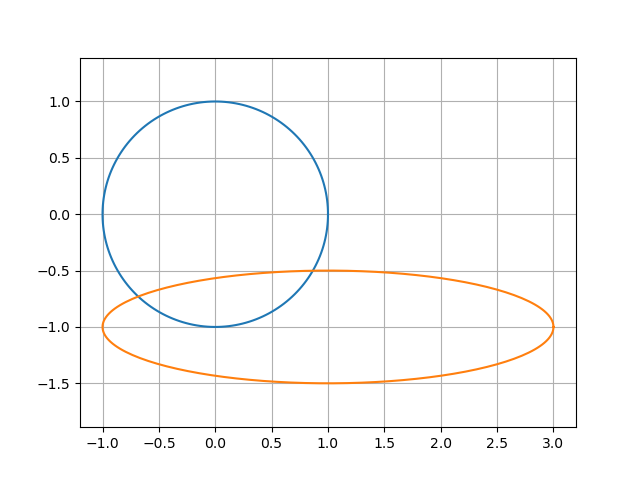

In [2]:
# Examples...

%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import *

fig = plt.figure(' ')

t = np.linspace(0,2*np.pi,200)
x = np.cos(t)
y = np.sin(t)
plt.plot(x,y)
u = 2*x + 1
v = (y/2) - 1
plt.plot(u,v)
plt.axis('equal')
plt.grid('on')

On substitution of (\ref{eq:Aff}) into (\ref{eq:qfun}) we arrive at the transformed quadratic

\begin{equation}\label{eq:qfunt}
   q(x,y) = 
   \begin{pmatrix} u & v & 1 \end{pmatrix}\begin{pmatrix} A^T & 0 \\ t^T &  1\end{pmatrix}
   \begin{pmatrix} Q & \ell \\ \ell^T &  f\end{pmatrix}
   \begin{pmatrix} A & t \\ 0 &  1\end{pmatrix}\begin{pmatrix} u \\ v \\ 1 \end{pmatrix} \equiv \tilde q(u,v)
\end{equation}

where

\begin{equation}\label{eq:cQt}
  \tilde{\cal Q} = \cA^T\cal Q\cA = \begin{pmatrix} A^TQA & A^TQt + A^T\ell \\ t^TQA+\ell^TA &  t^TQt + 2t^T\ell + f\end{pmatrix}
\end{equation}

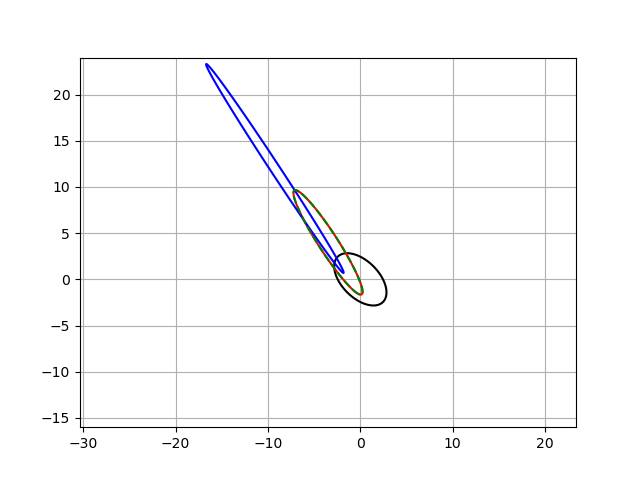

In [78]:
# transforming conics

%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import *

fig = plt.figure(' ')

x = np.linspace(-10,10,200)
y = x
X, Y = np.meshgrid(x, y) 

a = 1
b = 1
c = 1
d = 0
e = 0
f = -6

q = a*X*X + b*X*Y + c*Y*Y + d*X + e*Y + f

conic = plt.contour(X, Y, q, levels=[0], colors = 'k')

Q = np.array([[a, b/2],[b/2, c]])
ell = np.array([[d/2],[e/2]])

A = np.array([[2,1],[0,1/2]])
iA = np.array([[1/2,-1],[0,2]])
#A = iA
t = np.array([[3],[-2]])
#t = -iA@t
Qhat = A.T@Q@A
ellhat = A.T@(Q@t+ell)
fhat = f + t.T@Q@t + 2*t.T@ell

a = Qhat[0,0]
b = Qhat[0,1]*2
c = Qhat[1,1]
d = ellhat[0]*2
e = ellhat[1]*2

qhat = a*X*X + b*X*Y + c*Y*Y + d*X + e*Y + fhat

A = iA
it = -iA@t

conic2 = plt.contour(X, Y, qhat, levels=[0], colors ='r')
conic2 = plt.contour(A[0,0]*X+A[0,1]*Y+it[0], A[1,0]*X+A[1,1]*Y+it[1], qhat, levels=[0], colors ='b')

dat = conic.allsegs[0][0]
xydat = iA@dat.T - iA@t
plt.plot(xydat[0,:],xydat[1,:],'g--')

plt.grid('on')
plt.axis('equal');

### Ellipses

We begin with $a\ne 0$ and $b^2<4ac$ and carefully transform our ellipse into the unit circle centered at the origin. Our first step is to remove the cross term $bxy$ from $q$. We do this by choosing $A$ so that $A^TQA$ is diagonal. This is precisely the job of gaussian elimination. In particular, given

\begin{equation}\label{eq:Q0}
  \begin{pmatrix} a & b/2 \\ b/2 & c\end{pmatrix}
\end{equation}

we note the lower diagonal entry may be zeroed by multiplying the first row $-b/(2a)$ and adding this to the second row. This operation may be conducted via matrix multiplication as follows

\begin{equation}\label{eq:Q1}
  \begin{pmatrix} 1 & 0\\ -b/(2a) & 1\end{pmatrix} \begin{pmatrix} a & b/2 \\ b/2 & c\end{pmatrix} =
  \begin{pmatrix} a & b/2 \\ 0 & c-b^2/(4a)\end{pmatrix}
\end{equation}

If we now factor out the diagonal elements of that last matrix we find

\begin{equation}\label{eq:Q2}
  \begin{pmatrix} 1 & 0\\ -b/(2a) & 1\end{pmatrix} \begin{pmatrix} a & b/2 \\ b/2 & c\end{pmatrix} =
  \begin{pmatrix} a & b/2 \\ 0 & c-b^2/(4a)\end{pmatrix} =
  \begin{pmatrix} a & 0 \\ 0 & c-b^2/(4a)\end{pmatrix}\begin{pmatrix} 1 & b/(2a) \\ 0 & 1\end{pmatrix}
\end{equation}

On multiplying on the right by the inverse of our rightmost matrix we arrive at

\begin{equation}\label{eq:Q3}
  \begin{pmatrix} 1 & 0\\ -b/(2a) & 1\end{pmatrix} \begin{pmatrix} a & b/2 \\ b/2 & c\end{pmatrix} \begin{pmatrix} 1 & -b/(2a) \\ 0 & 1\end{pmatrix}=
  \begin{pmatrix} a & 0 \\ 0 & c-b^2/(4a)\end{pmatrix} 
\end{equation}

This is our desired diagonal form with

\begin{equation}\label{eq:Q4}
  A = \begin{pmatrix} 1 & -b/(2a) \\ 0 & 1\end{pmatrix} \and t = 0
\end{equation}

and so our new $\cal Q$ reads

\begin{equation}\label{eq:cQtE}
  \tilde{\cal Q} = \begin{pmatrix} D & A^T\ell \\ \ell^TA &  f\end{pmatrix} \equiv
  \begin{pmatrix} D & \tilde\ell \\ \tilde\ell^T &  f\end{pmatrix}  
\end{equation}

and now this we reduce via

\begin{equation}\label{eq:cQtEA}
  \cA = \begin{pmatrix} gD^{-1/2} & -D^{-1}\tilde\ell \\ 0 &  1\end{pmatrix} 
\end{equation}

so

\begin{equation}\label{eq:cQtEA2}
  \cA^T\tilde{\cal Q}\cA = \begin{pmatrix} gD^{-1/2} & 0 \\ -\tilde\ell^TD^{-1} &  1\end{pmatrix} 
  \begin{pmatrix} D & \tilde\ell \\ \tilde\ell^T &  f\end{pmatrix}
  \begin{pmatrix} gD^{-1/2} & -D^{-1}\tilde\ell \\ 0 &  1\end{pmatrix} =
  \begin{pmatrix} g^2I & 0 \\ 0 &  f - \tilde\ell^T D^{-1}\tilde\ell \end{pmatrix}
\end{equation}

and so $f - \tilde\ell^T D^{-1}\tilde\ell = -g^2$. So, in particular, $f<\tilde\ell^T D^{-1}\tilde\ell$.

\begin{exercise}\label{ex:GoodE} 
Confirm that $f<\tilde\ell^T D^{-1}\tilde\ell$ follows from our nondegeneracy condition, (\ref{eq:q6}).
\end{exercise}

### Parabolas

We suppose $a\ne 0$, $b^2=4ac$ and $2bd\ne 4ae$. We proceed as above and eliminate the $bxy$ term. Notice that the resulting diagonal form

\begin{equation}\label{eq:paD}
  D = \begin{pmatrix} a & 0 \\ 0 & c-b^2/(4a) \end{pmatrix} = 
  \begin{pmatrix} a & 0 \\ 0 & (4ac-b^2)/(4a) \end{pmatrix}  =
  \begin{pmatrix} a & 0 \\ 0 & 0 \end{pmatrix} 
\end{equation}

we choose 

\begin{equation}\label{eq:paA}
  \cA = \begin{pmatrix} 1 & 0 & -\tilde\ell_1/a \\ 0 & -a/(2\tilde\ell_2) & (\tilde\ell_1^2/a - f)/(2\tilde\ell_2) \\ 0 & 0 & 1 \end{pmatrix} 
\end{equation}

and arrive at our goal

\begin{equation}\label{eq:paQ}
  \tilde{\cal Q} = \begin{pmatrix} 1 & 0 & 0 \\ 0 & 0 & -1/2 \\ 0 & -1/2 & 0 \end{pmatrix} 
\end{equation}

\begin{exercise}\label{ex:GoodE} 
Confirm that $\tilde\ell_2\ne 0$ coincides with our nondegeneracy condition, $2bd\ne 4ae$.
\end{exercise}






### Hyperbolas

We have $b^2-4ac>0$ and $a>0$. 

We start with the case $ac>0$. Here our original transformation (elimination of $b$) yields diagonal terms of different signs.

If instead $ac<0$ then $b=0$ already and in addition $c<0$. 

Finally, if $ac=0$ then $b\ne 0$ and $c=0$ and our original eliminator yields the quadratic part

\begin{equation}\label{eq:HypD}
  D = \begin{pmatrix} a & 0 \\ 0 & -b^2/(4a) \end{pmatrix}
\end{equation}

and again the diagonal entries come with different signs.

As $D$ now have mixed signs we make a slight change in our second transformation

\begin{equation}\label{eq:cQtHA}
  \cA = \begin{pmatrix} g(JD)^{-1/2} & -D^{-1}\tilde\ell \\ 0 &  1\end{pmatrix} \where
  J \equiv \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix}
\end{equation}

and arrive at

\begin{equation}\label{eq:cQtHA2}
  \cA^T\tilde{\cal Q}\cA = \begin{pmatrix} g(JD)^{-1/2} & 0 \\ -\tilde\ell^TD^{-1} &  1\end{pmatrix} 
  \begin{pmatrix} D & \tilde\ell \\ \tilde\ell^T &  f\end{pmatrix}
  \begin{pmatrix} g(JD)^{-1/2} & -D^{-1}\tilde\ell \\ 0 &  1\end{pmatrix} =
  \begin{pmatrix} g^2J & 0 \\ 0 &  f - \tilde\ell^T D^{-1}\tilde\ell \end{pmatrix}
\end{equation}

and so require $f - \tilde\ell^T D^{-1}\tilde\ell = -g^2$.





## The three types are distinct

We note that a given conic is described by

\begin{equation}\label{eq:qfunpR}
\cal Q = \begin{pmatrix} Q & \ell \\ \ell^T &  f\end{pmatrix}
   \begin{pmatrix} x \\ y \\ 1 \end{pmatrix}
\end{equation}

where

\begin{equation}\label{eq:qfunpR2}
  Q = \begin{pmatrix} a & b/2  \\ b/2 & c\end{pmatrix} \and
  \ell = \begin{pmatrix} d/2 \\  e/2 \end{pmatrix}
\end{equation}

and that $\det(Q)=ac-b^2/4$ distinguishes between parabolas, ellipses, and hyperbolas. Under an affine transformation

\begin{equation}\label{eq:AffpR}
  \cA = \begin{pmatrix} A & t \\ 0 &  1\end{pmatrix}
\end{equation}

this quadratic becomes

\begin{equation}\label{eq:cQtR}
  \tilde{\cal Q} = \cA^T\cal Q\cA = \begin{pmatrix} A^TQA & A^TQt + A^T\ell \\ t^TQA+\ell^TA &  t^TQt + 2t^T\ell + f\end{pmatrix}
\end{equation}

and that $\det(A^TQA)=\det(A^T)\det(Q)\det(A) = \det(A)^2\det(Q)=\det(A)^2(ac-b^2/4)$ and as such

\begin{proposition}\label{prop:Cneq}
There is no affine transformation of a parabola to a hyperbola or an ellipse, and there is no affine transformation of an ellipse to a hyperbola.

\end{proposition}